In [ ]:
import torch

''' To compute gradients with respect to a tensor,
we need to set the requires_grad attribute to True.'''
x = torch.tensor(2.0, requires_grad=True)
''' Here, x is a tensor that is initialized a value 2.0.
requires_grad=True flag tells PyTorch to keep track of all
operations on this tensor so that it can compute gradients later.'''
# Define a quadratic function f(x) = x^2
# Here, y is another tensor that stores the result of the function
y = x**2

# To compute the gradient of y with respect to x, we use the backward()
y.backward()

# Print the gradient of y is stored in the value as x.grad.item()
print(f'The gradient of y with respect to x at x = {x} is {x.grad}')

The gradient of y with respect to x at x = 2.0 is 4.0


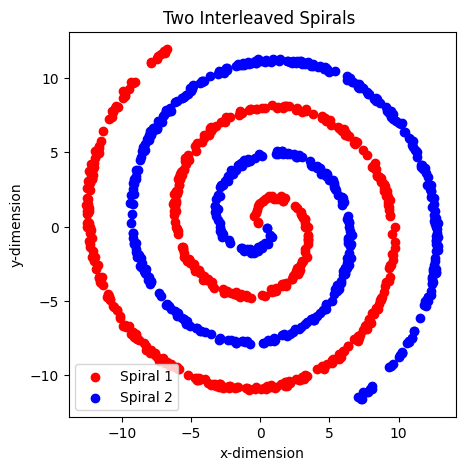

Epoch 1, Loss: 0.72528475522995
Epoch 51, Loss: 0.6174136400222778
Epoch 101, Loss: 0.603168249130249
Epoch 151, Loss: 0.5825742483139038
Epoch 201, Loss: 0.5703719854354858
Epoch 251, Loss: 0.5647072196006775
Epoch 301, Loss: 0.559594988822937
Epoch 351, Loss: 0.5545864105224609
Epoch 401, Loss: 0.549708366394043
Epoch 451, Loss: 0.544624388217926
Epoch 501, Loss: 0.5386962294578552
Epoch 551, Loss: 0.5308719873428345
Epoch 601, Loss: 0.5211775302886963
Epoch 651, Loss: 0.5068000555038452
Epoch 701, Loss: 0.483944833278656
Epoch 751, Loss: 0.43496742844581604
Epoch 801, Loss: 0.37068915367126465
Epoch 851, Loss: 0.2987799644470215
Epoch 901, Loss: 0.23960250616073608
Epoch 951, Loss: 0.19046343863010406


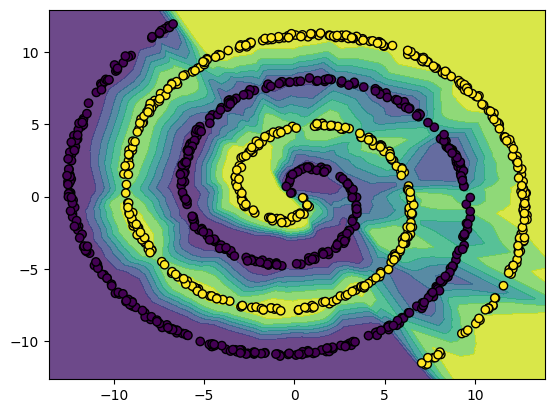

In [3]:
'''  We can include all libraries here'''
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt




def generate_spirals(number_of_points, noise):

    """
    generates two interleaved spirals
    Parameters:
        number_of_points (int): Total number of data points to generate.
        noise (float): Standard deviation of Gaussian noise added to the data.

    Returns:
        X (np.array): Spiral coordinates.
        Y (np.array): Labels (0 or 1).
    """
    n = np.sqrt(np.random.rand(number_of_points//2)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(number_of_points//2) * noise
    d1y = np.sin(n) * n + np.random.rand(number_of_points//2) * noise
    spiral_1 = np.vstack((d1x, d1y)).T

    d2x = np.cos(n) * n + np.random.rand(number_of_points//2) * noise
    d2y = -np.sin(n) * n + np.random.rand(number_of_points//2) * noise
    spiral_2 = np.vstack((d2x, d2y)).T

    X = np.vstack((spiral_1, spiral_2))
    Y = np.hstack((np.zeros(number_of_points//2), np.ones(number_of_points//2)))
    return X, Y


'''  This method is used to plot the decision boundary by using a grid as input to the model '''
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Generate a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    # xx.ravel() and yy.ravel() flatten the 2D arrays into 1D arrays.
    grid = np.c_[xx.ravel(), yy.ravel()]
    '''  torch.no_grad() ensures that the operations within this block do not track gradients,
    which is important for inference (predicting without updating model parameters).'''
    with torch.no_grad():
        Z = model(torch.tensor(grid, dtype=torch.float32))
    Z = Z.reshape(xx.shape)
    # Creates a filled contour plot showing the decision boundary.
    plt.contourf(xx, yy, Z, alpha=0.8)
    # Plots the original data points, with colors indicating their true class labels y
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()


'''  A fully connected feedforward neural network (Multilayer Perceptron or MLP) is used here  '''
class MLPNet(nn.Module):
    ''' __init__ allows you to set up the initial state of an object by assigning values to its attributes.'''
    def __init__(self):
        ''' The super(MLPNet, self).__init__() call invokes the __init__ method
        of the parent class nn.Module.
         '''
        super(MLPNet, self).__init__()
        '''  A fully connected (dense) layer that transforms the input from 2 features to 64 features.
        Try to use different values such as 4, 32, 64, 128 and see its effect on the decsion boundary
        '''
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        '''  The final fully connected layer that outputs a single value,
        suitable for binary classification. '''
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        '''  ReLU would produce outputs in the range [0, ∞),
        while sigmoid ouputs in the range [0, 1] suitable for binary classification
        for this task only. '''
        x = torch.sigmoid(self.fc3(x))
        return x



# generate data in X and labels in Y
X, Y = generate_spirals(number_of_points=1000, noise = 0.3)

# Plot the spirals
plt.figure(figsize=(5, 5))
# When Y is 0 it is spiral 1 when Y is 1 then it is spiral 2
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Spiral 1')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Spiral 2')
plt.title('Two Interleaved Spirals ')
plt.xlabel('x-dimension')
plt.ylabel('y-dimension')
plt.legend()
plt.show()

# MLP model defined above
model = MLPNet()

# Binary Cross-Entropy Loss.
criterion = nn.BCELoss()
# Adam optimizer , learning rate is 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)

# convertX and Y to tensor to be used for DL
#  tensor should use 32-bit floating-point numbers
X_tensor = torch.tensor(X, dtype=torch.float32)
'''  view reshapes it into a 2D tensor with one column and
as many rows as needed to accommodate all the elements '''
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

for epoch in range(1000):
    model.train()
    ''' optimizer.zero_grad() clears the current gradients of all the parameters
    managed by the optimizer. This is necessary to ensure that each optimization
    step uses only the gradients from the current forward and backward pass,
     not the accumulated gradients from previous passes.'''
    optimizer.zero_grad()
    outputs = model(X_tensor)
    # Y_tensor is the ground truth and outputs are predictions
    loss = criterion(outputs, Y_tensor)
    '''  loss.backward() initiates the backward pass.
    PyTorch computes the gradients of the loss with respect to each parameter
    in the model by applying the chain rule of calculus.
     These gradients are stored in the .grad attribute of each parameter.
    '''
    loss.backward()
    ''' optimizer.step(), the optimizer iterates over the model parameters
    and adjusts them based on their gradients'''
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# plot the decision boundary to see how the model works
plot_decision_boundary(model, X, Y)